In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

from scripts.simulation import ar, rossler
from scripts.plots import filtering

In [2]:
N = 50

print("Simulating signals...")
t, signals = rossler.simulate_multi(N=N, wx=0.5, wy=1, exy=0, eyx=0, seed=0)
signal_x = signals[:, 0, :] #x1 components (n_samples, N)
signal_y = signals[:, 3, :] #y1 components (n_samples, N)

print("Computing MPC...")
fc_MPC_uncoupled, fc_array = filtering.fc_sweep(signal_x, signal_y, bw=2)
bw_MPC_uncoupled, bw_array = filtering.bw_sweep(signal_x, signal_y)

Simulating signals...
Computing MPC...


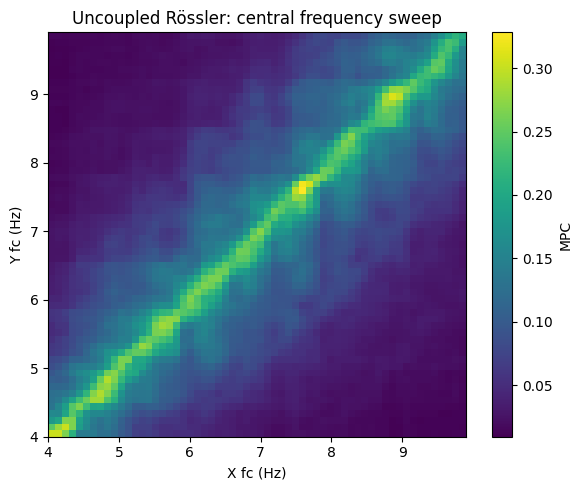

In [3]:
filtering.mpc_heatmap(fc_MPC_uncoupled, fc_array, log=False, title="Uncoupled Rössler: central frequency sweep", xlabel="X fc (Hz)", ylabel="Y fc (Hz)")

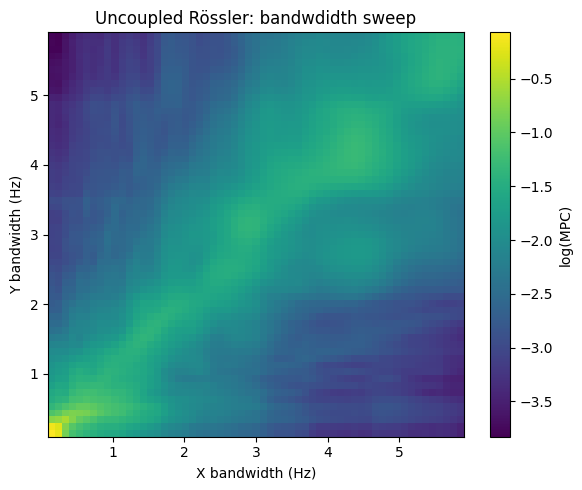

In [4]:
filtering.mpc_heatmap(bw_MPC_uncoupled, bw_array, log=True, title="Uncoupled Rössler: bandwdidth sweep")

In [26]:
N = 50

print("Simulating signals...")
t, signals = rossler.simulate_multi(N=N, wx=1, wy=2, exy=1, eyx=1, seed=0)
signal_x = signals[:, 0, :] #x1 components (n_samples, N)
signal_y = signals[:, 3, :] #y1 components (n_samples, N)

print("Computing MPC...")
fc_MPC_coupled, fc_array = filtering.fc_sweep(signal_x, signal_y, bw=2)
bw_MPC_coupled, bw_array = filtering.bw_sweep(signal_x, signal_y)

Simulating signals...
Computing MPC...


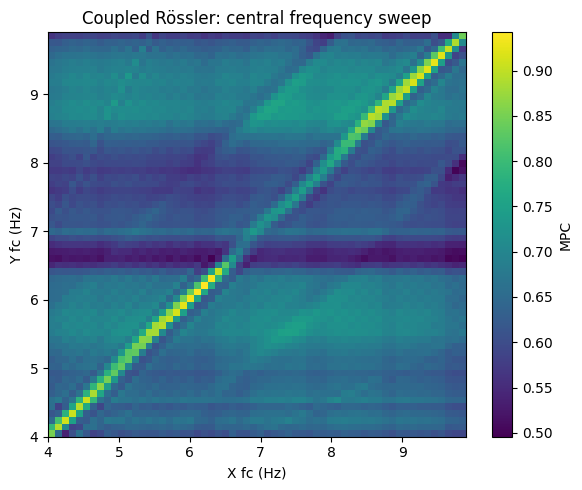

In [27]:
filtering.mpc_heatmap(fc_MPC_coupled, fc_array, log=False, title="Coupled Rössler: central frequency sweep", xlabel="X fc (Hz)", ylabel="Y fc (Hz)")

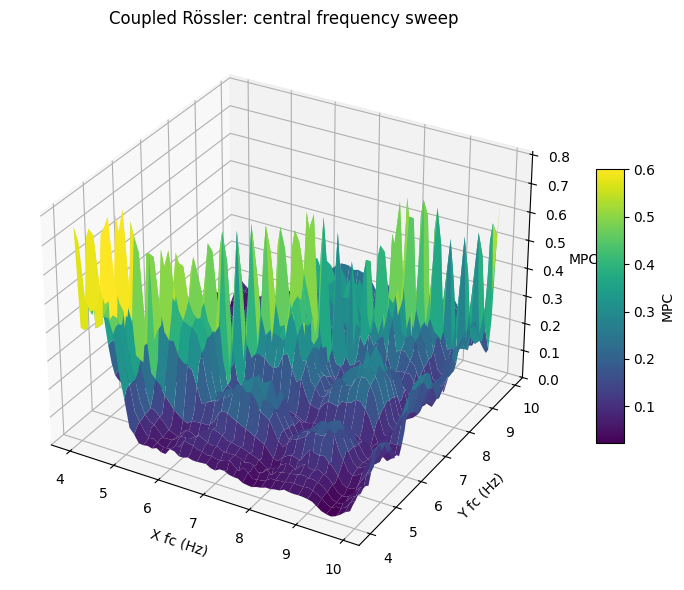

In [17]:
filtering.mpc_surface(fc_MPC_coupled, fc_array, log=False, title="Coupled Rössler: central frequency sweep", xlabel="X fc (Hz)", ylabel="Y fc (Hz)")

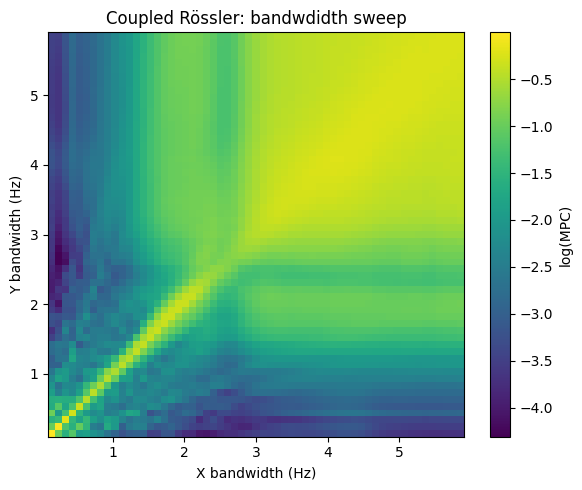

In [7]:
filtering.mpc_heatmap(bw_MPC_coupled, bw_array, log=True, title="Coupled Rössler: bandwdidth sweep")

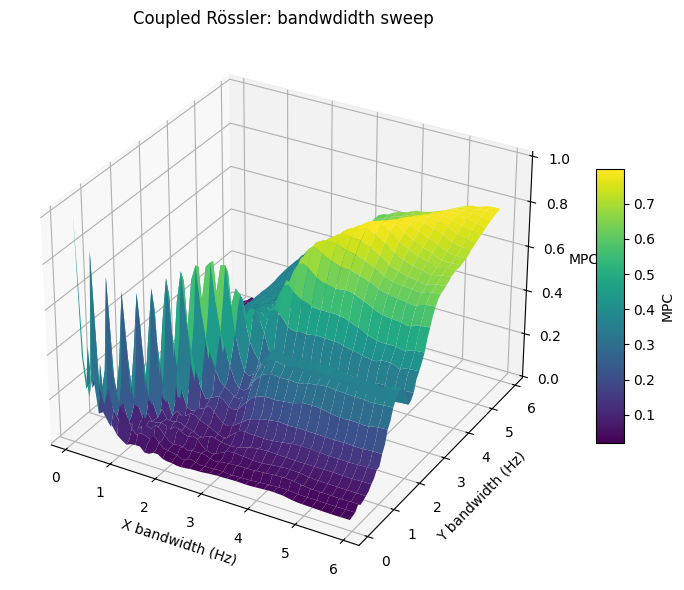

In [16]:
filtering.mpc_surface(bw_MPC_coupled, bw_array, log=False, title="Coupled Rössler: bandwdidth sweep")

In [9]:
N = 250

print("Simulating signals...")
t, signals = ar.simulate(phi=[0.9], N=2*N, seed=0)
signal_x = signals[:, :N-1]
signal_y = signals[:, N:]

print("Computing MPC...")
fc_MPC_ar, fc_array = filtering.fc_sweep(signal_x, signal_y, bw=2)
bw_MPC_ar, bw_array = filtering.bw_sweep(signal_x, signal_y)

Simulating signals...
Computing MPC...


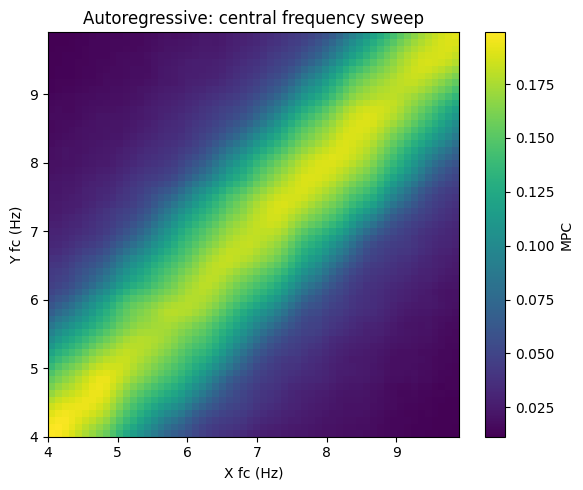

In [10]:
filtering.mpc_heatmap(fc_MPC_ar, fc_array, log=False, title="Autoregressive: central frequency sweep", xlabel="X fc (Hz)", ylabel="Y fc (Hz)")

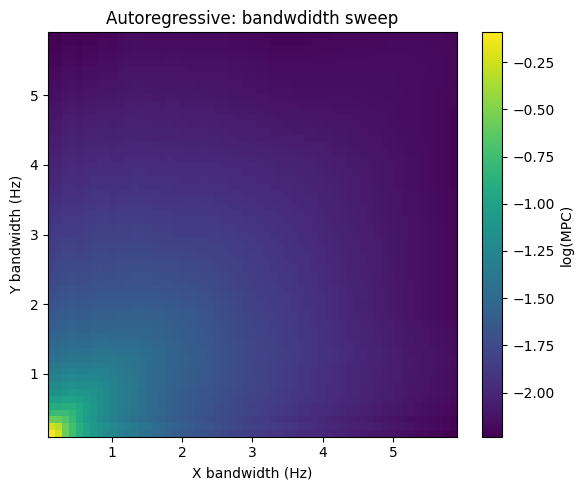

In [11]:
filtering.mpc_heatmap(bw_MPC_ar, bw_array, log=True, title="Autoregressive: bandwdidth sweep")

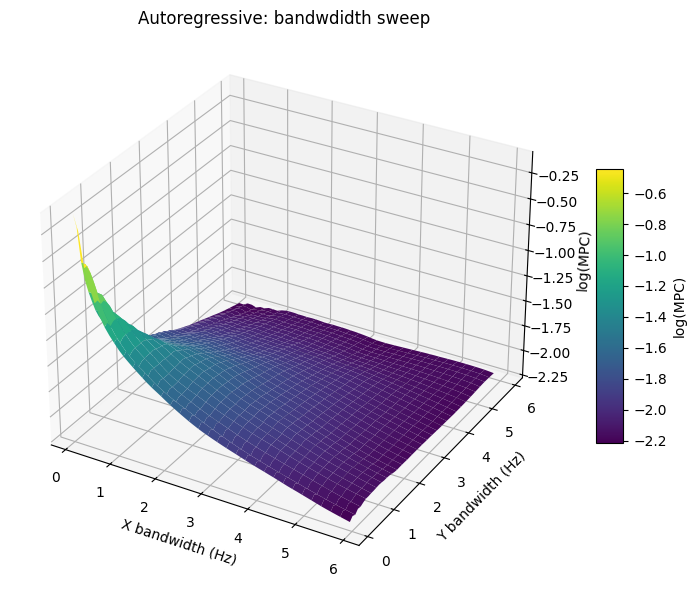

In [14]:
filtering.mpc_surface(bw_MPC_ar, bw_array, log=True, title="Autoregressive: bandwdidth sweep")